In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
path = '/home/pedrorozin/scripts/class_public/delta_prime_cdm.txt'

#import the data as df with first column as 'a' and second column as 'delta_prime_cdm'
# df = pd.read_csv(path, header=None, sep=' ', names=['a', 'delta_prime_cdm'])
df = pd.read_csv(path, sep=' ', names=['delta_cdm', 'delta_prime_cdm', 'a', 'k'])
df.head()



,delta_cdm,delta_prime_cdm,a,k
0,-0.902804,-0.015484,5.263166e-07,0.287244
1,-0.902746,-0.018245,4.398728e-07,0.343629
2,-0.902842,-0.014114,5.831465e-07,0.259283
3,-0.902804,-0.015484,5.263166e-07,0.287244
4,-0.902804,-0.015484,5.263166e-07,0.287244


In [30]:
#print max k
print('Max k:', df['k'].max())

Max k: 1.009831


In [22]:
#print row with the first value of k greater or equal to 0.01
k_threshold = 0.01
df_filtered = df[df['k'] >= k_threshold]
df_filtered = df_filtered.sort_values(by='k')
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.head()

df_k = df_filtered[df_filtered['k'] == df_filtered['k'].min()]
df_k['delta_prime_cdm'] = -df_k['delta_prime_cdm'].astype(float)
df_k['delta_cdm'] = -df_k['delta_cdm'].astype(float)

df_k.head()



/tmp/ipykernel_905/2246162088.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['delta_prime_cdm'] = -df_k['delta_prime_cdm'].astype(float)
/tmp/ipykernel_905/2246162088.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_k['delta_cdm'] = -df_k['delta_cdm'].astype(float)


,delta_cdm,delta_prime_cdm,a,k
0,2.545259,0.008487,0.001106,0.010077
1,2.545259,0.008487,0.001106,0.010077
2,2.545259,0.008487,0.001106,0.010077
3,100.763000,0.054943,0.066796,0.010077
4,102.211400,0.055340,0.067769,0.010077


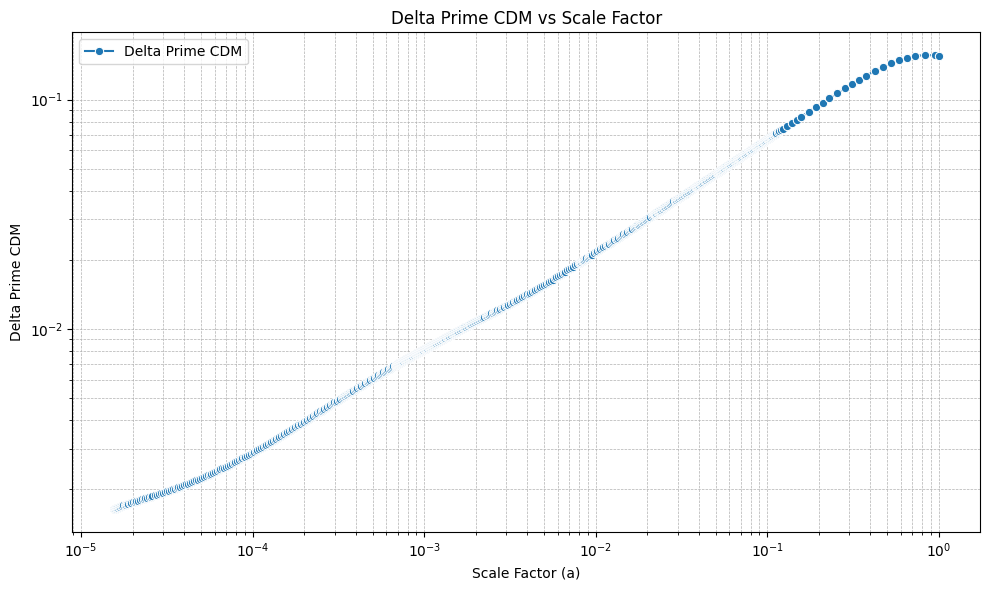

In [19]:
#plot delta_prime vs a
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_k, x='a', y='delta_prime_cdm', marker='o', label='Delta Prime CDM')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Delta Prime CDM')
plt.title('Delta Prime CDM vs Scale Factor')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
# plt.savefig('delta_prime_cdm_vs_a.png')
# Show the plot
plt.show()

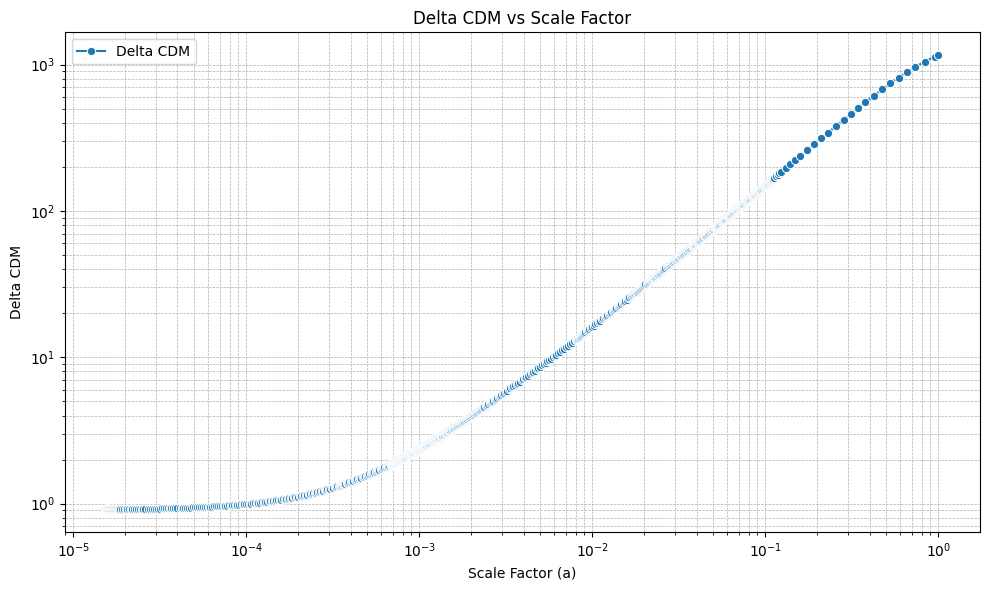

In [23]:
#same with delta_cdm
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_k, x='a', y='delta_cdm', marker='o', label='Delta CDM')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Delta CDM')
plt.title('Delta CDM vs Scale Factor')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
# plt.savefig('delta_cdm_vs_a.png')
# Show the plot
plt.show()


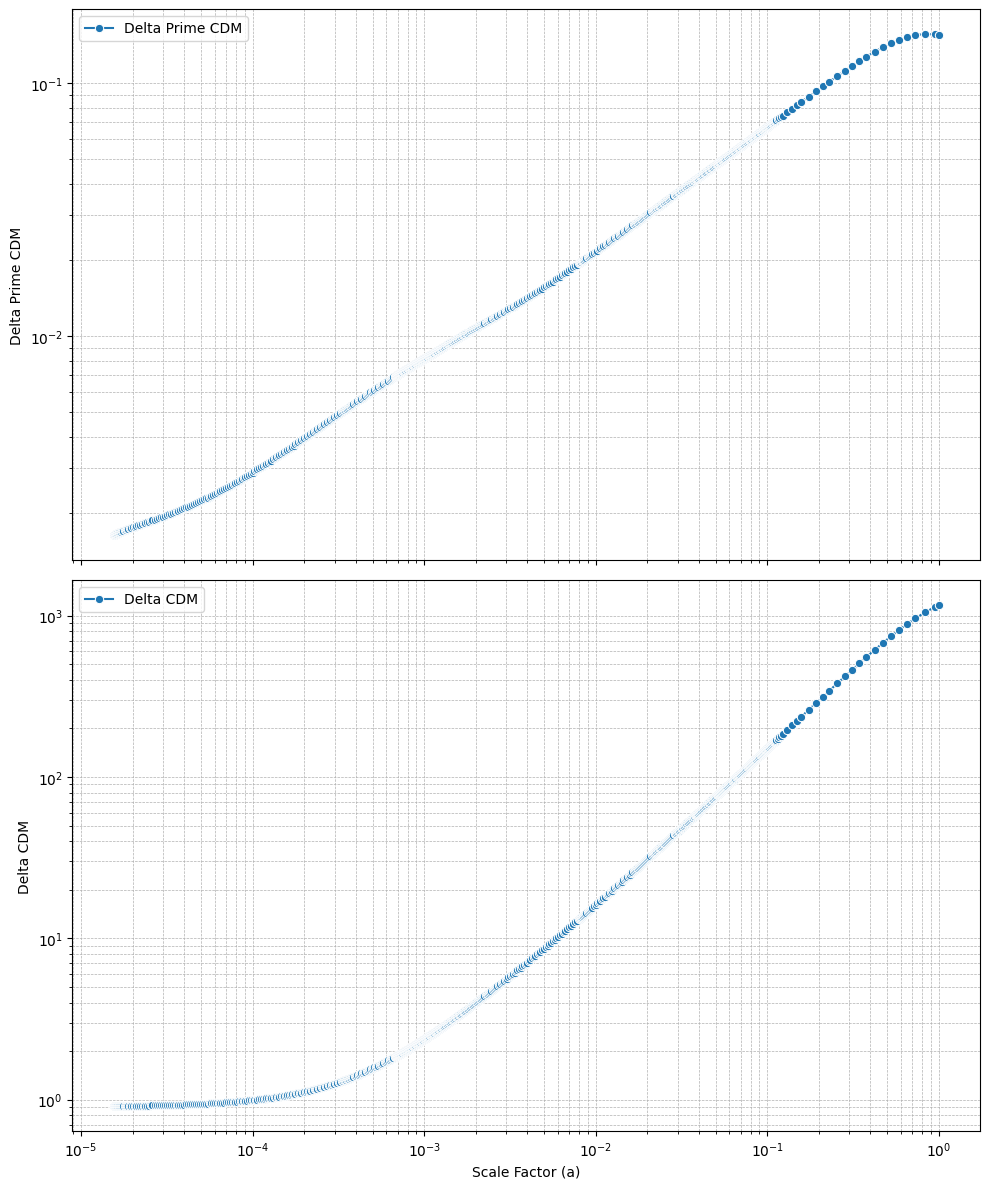

In [29]:
#plot both delta_prime_cdm and delta_cdm in the same plot with subfgigure 2,1
fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
sns.lineplot(data=df_k, x='a', y='delta_prime_cdm', marker='o', label='Delta Prime CDM', ax=ax[0])
sns.lineplot(data=df_k, x='a', y='delta_cdm', marker='o', label='Delta CDM', ax=ax[1])
ax[0].set_xscale('log')
ax[0].set_yscale('log')
# ax[0].set_xlabel('Scale Factor (a)')
ax[0].set_ylabel('Delta Prime CDM')
# ax[0].set_title('Delta Prime CDM vs Scale Factor')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Scale Factor (a)')
ax[1].set_ylabel('Delta CDM')
# ax[1].set_title('Delta CDM vs Scale Factor')
ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
ax[0].legend()
ax[1].legend()
plt.tight_layout()
# plt.savefig('delta_prime_cdm_and_delta_cdm_vs_a.png')
# Show the plot
plt.show()

### Funciones para integrar numéricamente

In [ ]:
from scipy.integrate import simpson
from scipy.integrate import solve_ivp
import numpy as np

In [ ]:
def Hh(params,a):
    Om_m_0, s8=params
    Om_L=1-Om_m_0-Om_r
    return np.sqrt(Om_L+Om_m_0/a**3+Om_r/a**4)

def Hh_p(params,a):
    Om_m_0, s8=params
    Om_L = 1-Om_m_0-Om_r
    num = (3*Om_m_0/a**4+4*Om_r/a**5)
    den = 2*np.sqrt(Om_L+Om_m_0/a**3+Om_r/a**4)
    return -num/den

def fs8(params,a): #fs8  
    Om_m_0, s8=params
    a=np.array(a)    
    def F(a,X):
        f1=X[1] 
        term1=X[0]*3*Om_m_0/(2*(Hh(params,a)**2)*(a**5))
        term2=-X[1]*((3/a)+(Hh_p(params,a)/Hh(params,a)))
        f2=term1+term2
        return np.array([f1,f2])
    a_vec=np.linspace(a_0,a_f,2000)
    atol, rtol = 1e-15, 1e-12
    out2 = solve_ivp(fun = F, t_span = [a_0,a_f], y0 = np.array([a_0,1]),
                    t_eval = a_vec, method = 'RK45')
    delta_num=out2.y[0]
    delta_p_num=out2.y[1]
    delta_today=delta_num[-1]
    fs8_teo=[]
    for i in range(len(a)):
        a_val=a[i]
        indice = np.argmin(np.abs(np.array(a_vec) - a_val))
        fs8_teo.append(s8*a[i]*delta_p_num[indice]/delta_today)
    return fs8_teo

def Integrando(params):
    Om_m_0, s8 = params
    return lambda a: 1/((a**2)*Hh(params,a))

def dL(params,a):
    Om_m_0, s8=params    
    x = np.linspace(a, 1, 500)
    y = Integrando((Om_m_0, s8))(x)
    return simpson(y, x)



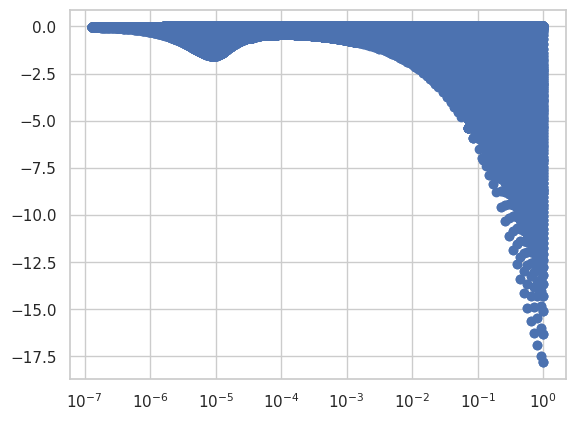

In [81]:
plt.plot(df1['a'], df1['delta_prime_cdm'], 'bo',label='Delta Prime CDM')
#logscale-
plt.xscale('log')
# plt.yscale('log')

/tmp/ipykernel_111670/2881916366.py:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


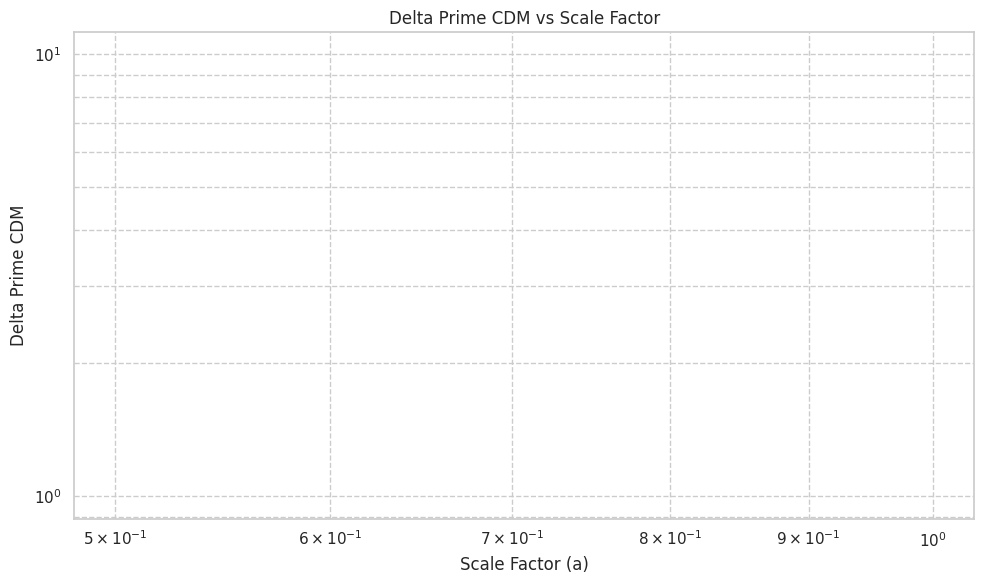

In [8]:
#plot the data with sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='a', y='delta_prime_cdm', data=df, marker='o', color='blue')
plt.title('Delta Prime CDM vs Scale Factor')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Delta Prime CDM')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.tight_layout()
# Save the plot